# Challenge 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
'''
import numpy as np

import seaborn as sns
%matplotlib inline
'''

'\nimport numpy as np\n\nimport seaborn as sns\n%matplotlib inline\n'

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('../data/titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
#Numerical values
titanic.select_dtypes(include="number").head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [5]:
#Categorical values
#titanic.select_dtypes(include="category")

#Since 'select_dtypes' doesn't work properly here, so manual filtering would be required

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
plt.style.use("classic")
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

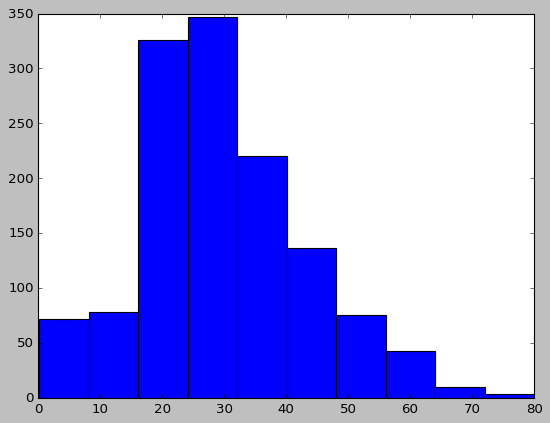

In [7]:
 plt.hist(titanic["Age"]);

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

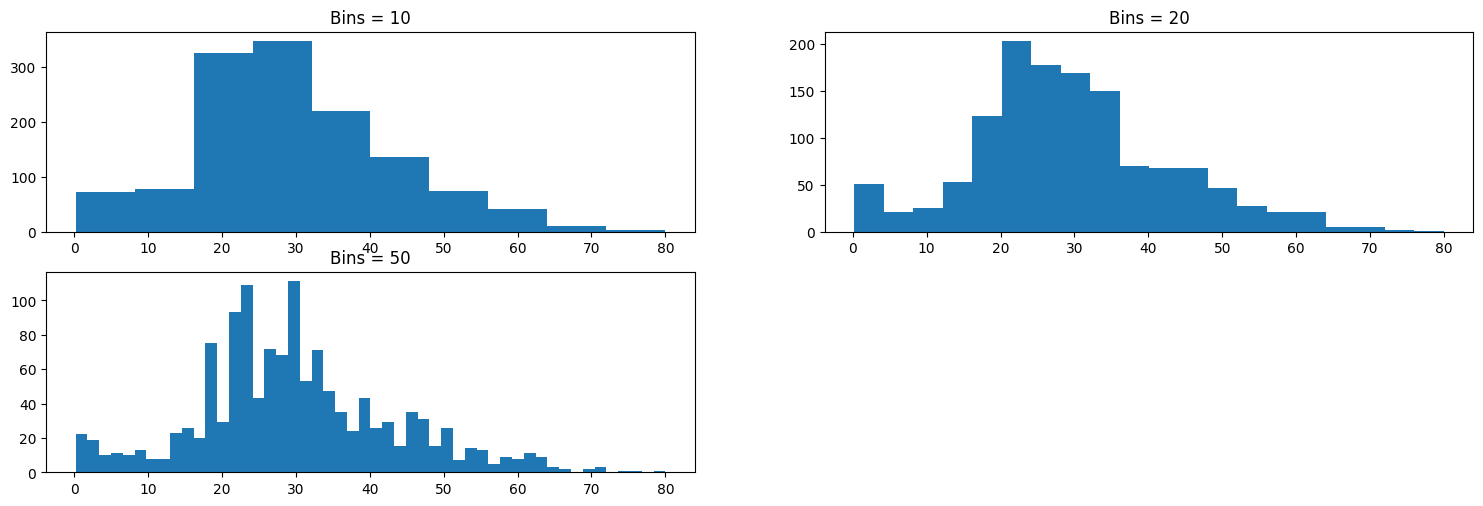

In [8]:
#Restore visuals
plt.style.use("default")

#Size and distance between
plt.subplots(figsize=(15,5))
plt.tight_layout()

#1st subplot
plt.subplot(2,2,1)
plt.hist(titanic["Age"], bins=10)
plt.title("Bins = 10")

#2nd subplot
plt.subplot(2,2,2)
plt.hist(titanic["Age"], bins=20)
plt.title("Bins = 20")

#3rd subplot
plt.subplot(2,2,3)
plt.hist(titanic["Age"], bins=50)
plt.title("Bins = 50");

#### Whether the bin size affects your plot? Why?

In [9]:
#Modify intervals size in histogram

#### Use seaborn to show the distribution of the column `Age`

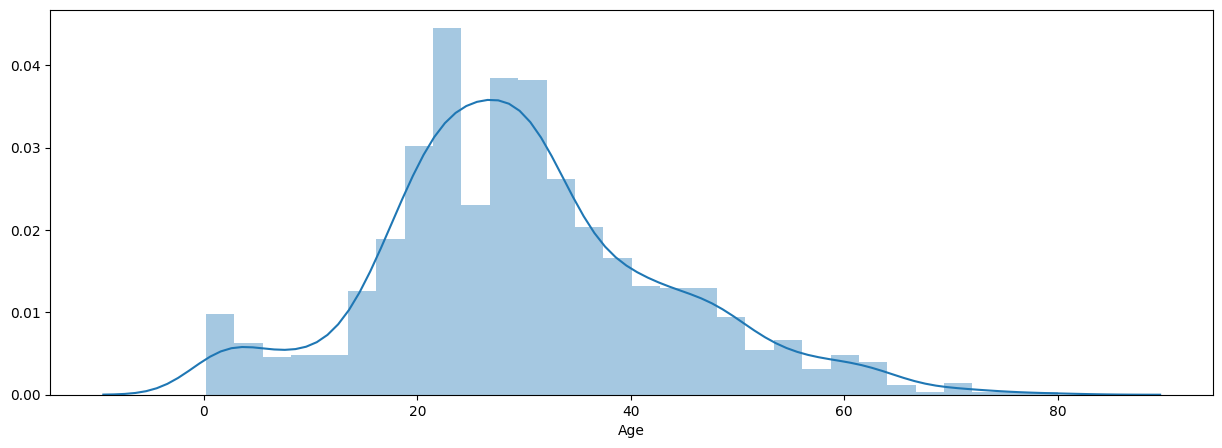

In [10]:
plt.figure(figsize=(15, 5))
sns.distplot(titanic["Age"]);

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

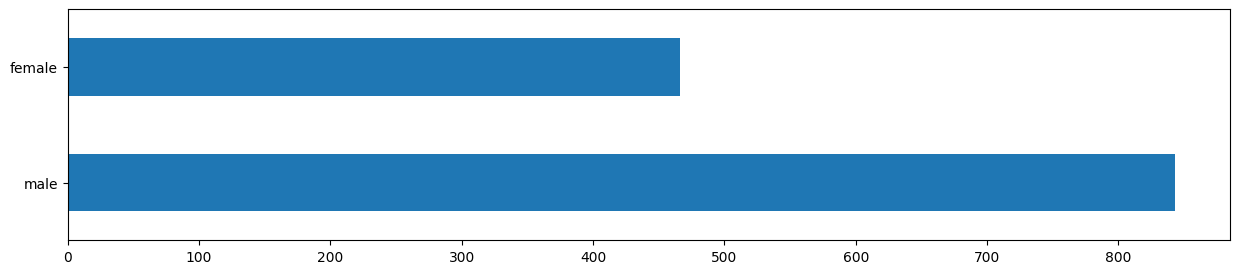

In [11]:
#With Matplotlib
plt.figure(figsize=(15, 3))
titanic["Gender"].value_counts().plot(kind='barh');

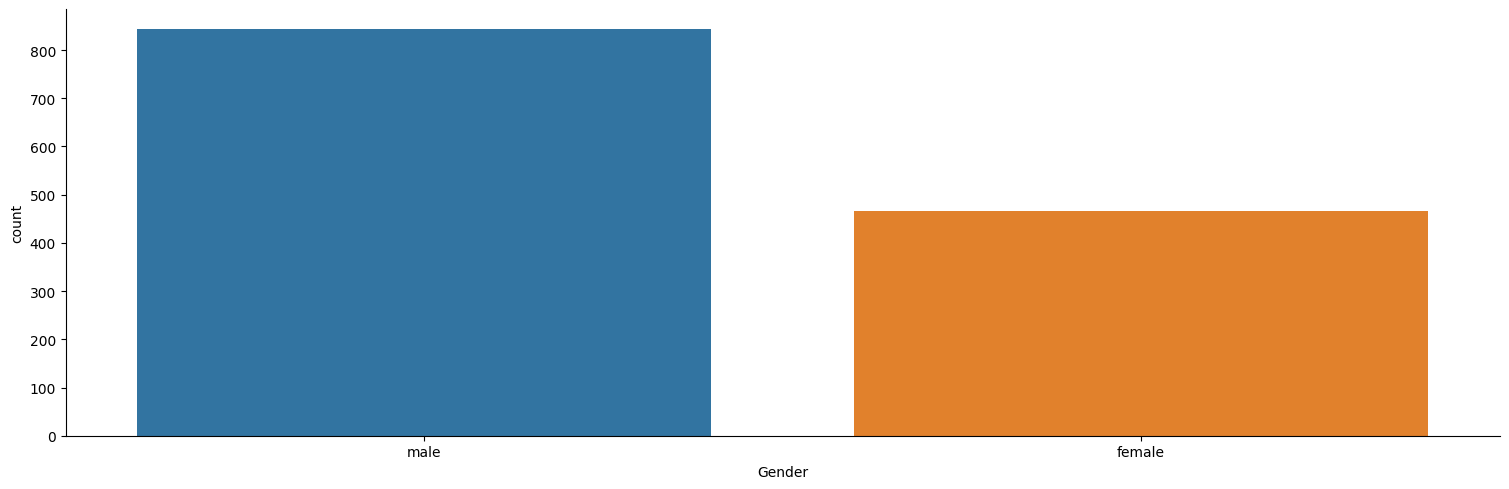

In [12]:
#With Seaborn
sns.catplot(x="Gender", kind="count", data=titanic, orient="h", height=5, aspect=3);

#### Use the appropriate plot to visualize the column `Pclass` 


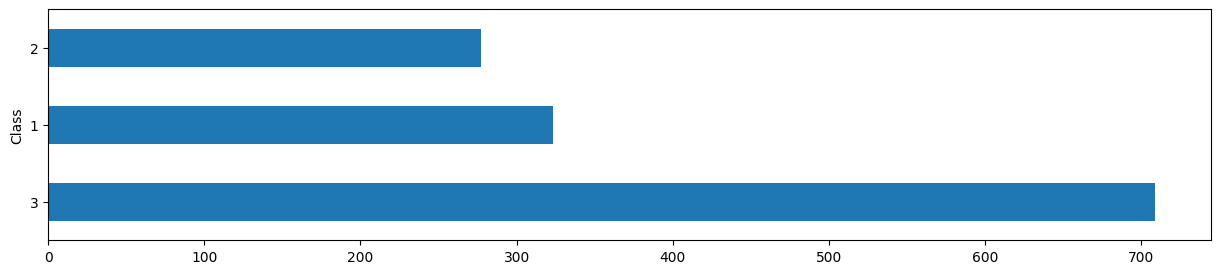

In [13]:
plt.figure(figsize=(15, 3))
plt.ylabel("Class")

titanic["Pclass"].value_counts().plot(kind='barh');

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

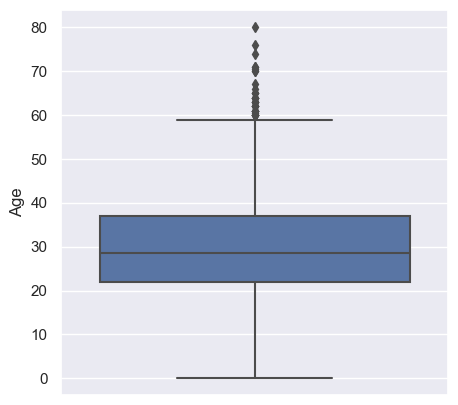

In [14]:
#Figure size
plt.figure(figsize=(5, 5))

#Introduce grid
sns.set()

sns.boxplot(y=titanic["Age"]);

#### What does the previous plot tell you about the feature `Age`? Comment.

In [15]:
#Median: near to 29
#Q1: near 22
#Q3: near 37
#Minimum: 0
#Maximum: near 59
#Outliers: there are several outliers above 60

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

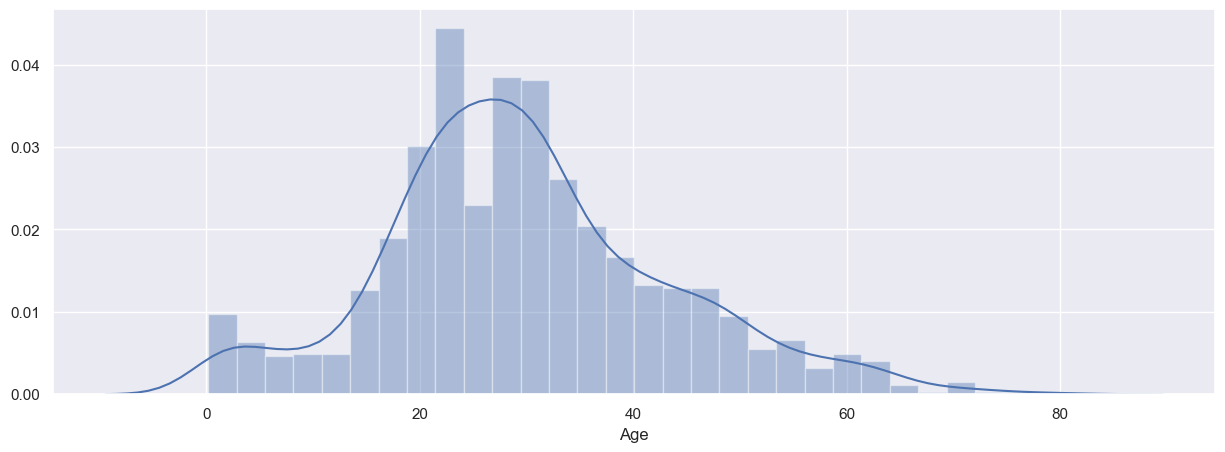

In [16]:
#Same than previus exercise
plt.figure(figsize=(15, 5))
sns.distplot(titanic["Age"]);

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [17]:
#The most common age of passengers was around 22 years old

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

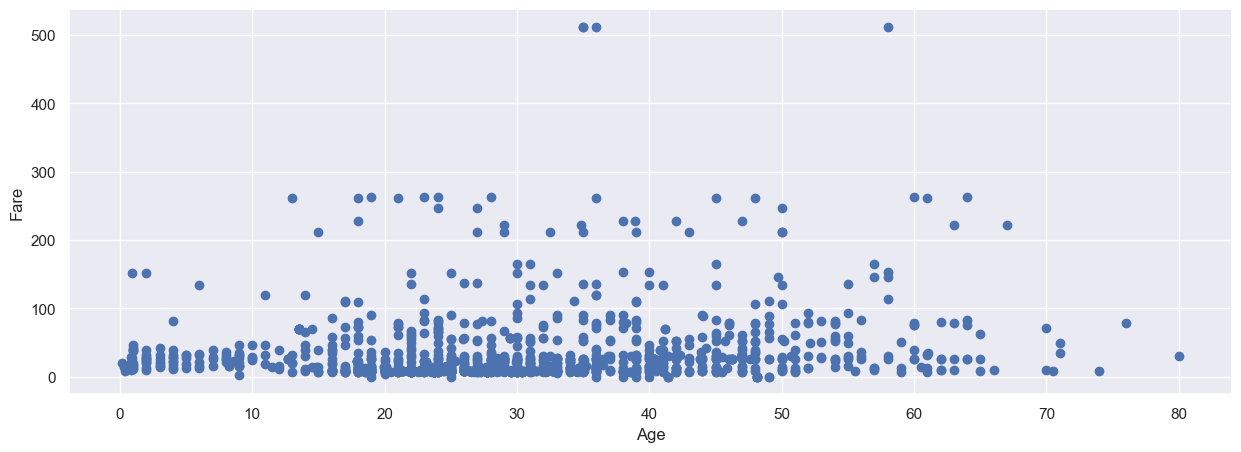

In [18]:
#With Matplotlib
plt.figure(figsize=(15, 5))
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(titanic["Age"], titanic["Fare"]);

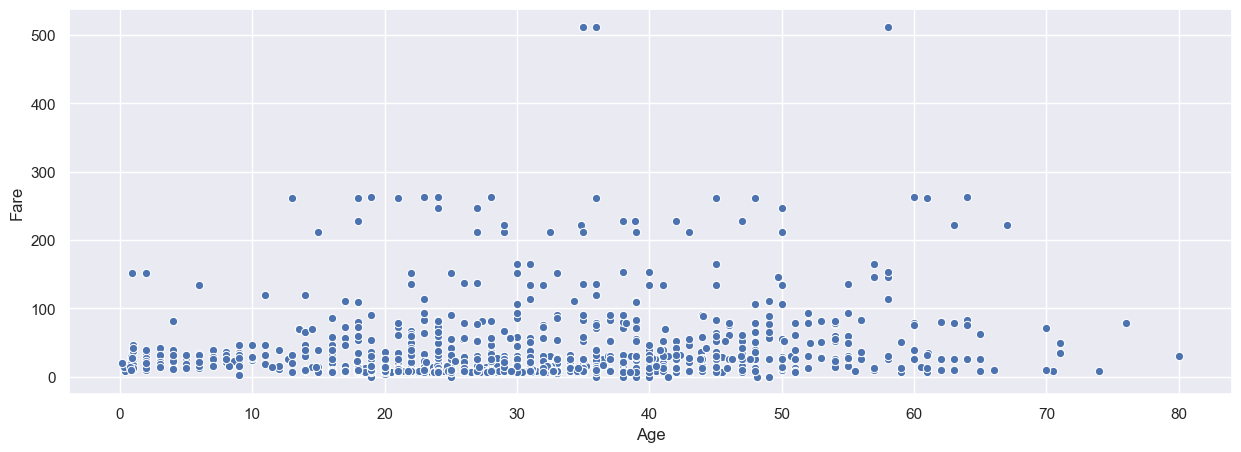

In [19]:
#With Seaborn
plt.figure(figsize=(15, 5))
sns.scatterplot(x="Age", y="Fare", data=titanic)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

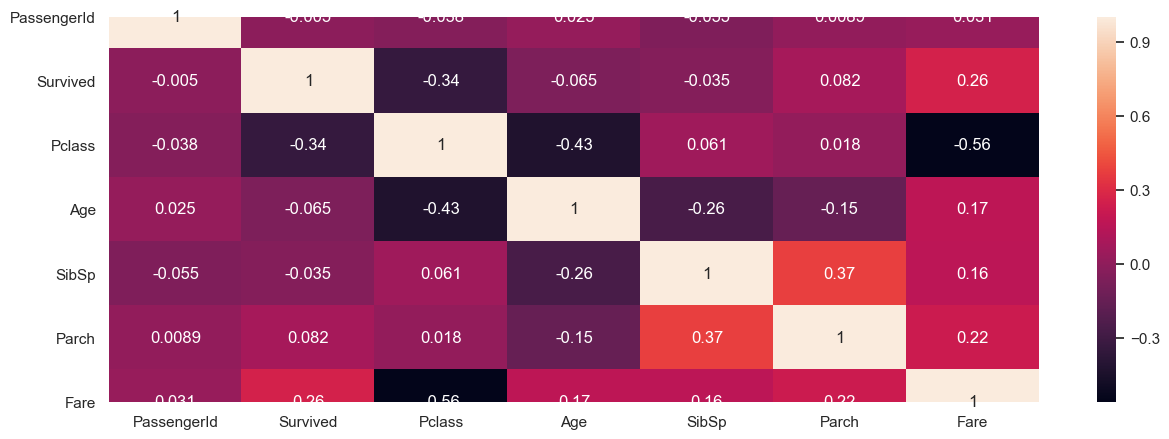

In [20]:
plt.figure(figsize=(15,5))
sns.heatmap(titanic.corr(), annot=True);

#Boxes seems to be cut off until SNS 3.1.2: https://github.com/mwaskom/seaborn/issues/1773

#### According to the previous plot, what are the most correlated feature? Comment.

In [21]:
#1st: Fare and PClass
#2nd: Age and PClass

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

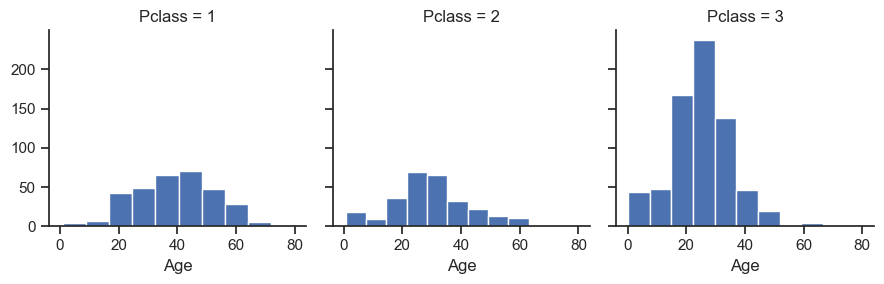

In [22]:
#Viz setup
sns.set(style="ticks", color_codes=True)

#Plot config
pclass_distribution = sns.FacetGrid(titanic, col="Pclass")
pclass_distribution.map(plt.hist, "Age");

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

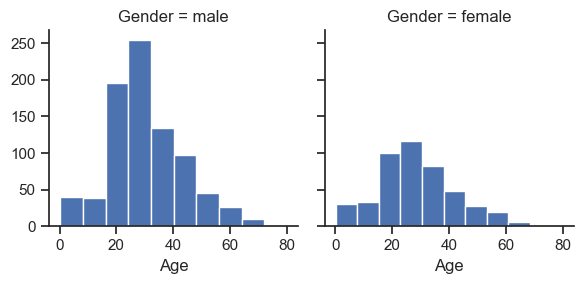

In [24]:
#Viz setup
sns.set(style="ticks", color_codes=True)

#Plot config
gender_distribution = sns.FacetGrid(titanic, col="Gender")
gender_distribution.map(plt.hist, "Age");